In [1]:
import numpy as np
from genetic_alogorithm_pmf_api import Problem

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# 1. Create problem
problem = Problem(
    variables=['x1', 'x2', 'x3', 'x4'],
    bounds=[0, 260]
)

# 2. Add stakeholder 1: Project Developer
problem.add_stakeholder(
    name="Project developer",
    weight=0.50,
    objective="11.25*x1 + 13.75*x2 + 15*x3 + 11.25*x4",
    preference_points=([3000, 3500, 4000], [0, 20, 100])
)

# 3. Add stakeholder 2: Municipality
problem.add_stakeholder(
    name="Municipality",
    weight=0.50,
    objective="x1 + x4",
    preference_points=([100, 125, 160], [0, 50, 100])
)

# 4. Add constraints (natural syntax)
problem.add_constraint("x1 + x2 + x3 + x4 >= 200")  # min 200 houses
problem.add_constraint("x1 + x2 + x3 + x4 <= 260")  # max 260 houses
problem.add_constraint("11.25*x1 + 13.75*x2 + 15*x3 + 11.25*x4 >= 3000")  # min profit
problem.add_constraint("11.25*x1 + 13.75*x2 + 15*x3 + 11.25*x4 <= 4000")  # max profit
problem.add_constraint("x1 + x4 >= 100")  # min affordable
problem.add_constraint("x1 + x4 <= 150")  # max affordable


Run GA with minmax
The type of aggregation is set to minmax
Generation   Best score   Mean             Max stall    Diversity    Number of non-feasible results
0            45.2526      470333333.4238   0            0.009        499         
1            44.9155      217666676.9579   0            0.092        388         
2            40.5756      139666689.988    0            0.106        243         
3            40.5756      125333355.9929   1            0.246        232         
4            40.5756      110000024.3778   2            0.245        210         
5            40.5756      95000025.8846    3            0.239        193         
6            40.5756      104333358.4964   4            0.246        200         
7            40.5756      89666692.8365    5            0.244        187         
8            40.5756      86333361.0644    6            0.242        168         
9            40.5756      87666693.7163    7            0.238        177         
10           40.575

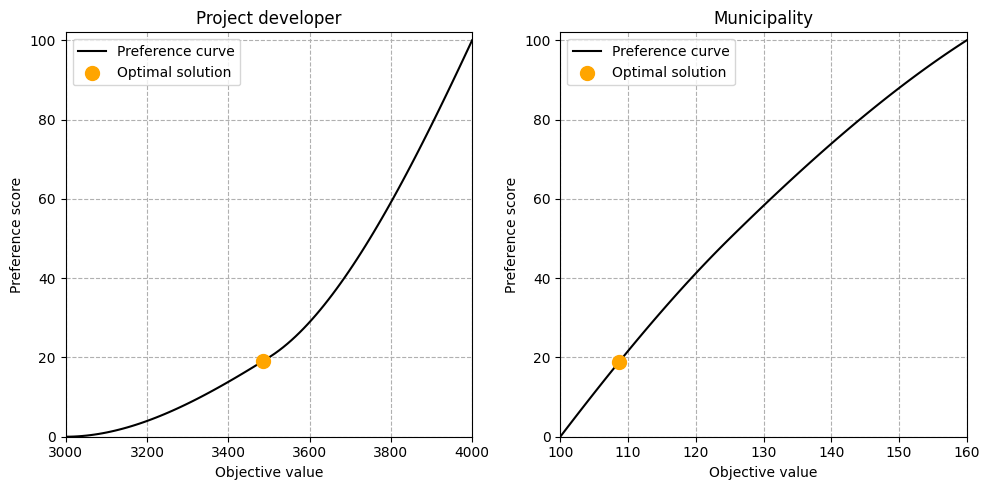

In [3]:
# 5. Solve with both paradigms
paradigm = 'minmax'

print(f'\n{"="*60}')
print(f'Run GA with {paradigm}')
print(f'{"="*60}')

# Set seed immediately before GA run (like in chapter_11_1.ipynb)
np.random.seed(42)

result = problem.solve(paradigm=paradigm)

# 6. Print results
print(f'\nOptimal result:')
for var_name, var_value in result.variables.items():
    print(f'  {var_name} = {var_value:.2f} houses')

print(f'\nScore: {result.score:.4f}')

print(f'\nStakeholder results:')
for name, data in result.stakeholders.items():
    print(f'  {name}:')
    print(f'    Objective value: {data["objective_value"]:.2f}')
    print(f'    Preference score: {data["preference_score"]:.2f}')

# 7. Plot results for minmax
print(f'\n{"="*60}')
print('Plotting results for minmax paradigm...')
print(f'{"="*60}\n')

result.plot()


Run GA with tetra
The type of aggregation is set to tetra
Generation   Best score   Mean             Max stall    Diversity    Number of non-feasible results
No initial starting point for the optimization with tetra is given. A random population is generated.
0            -97.2646     470333333.1388   1            0.009        499         
1            -39.8701     217666659.084    1            0.092        388         
2            -29.0589     187666657.8647   1            0.068        330         
3            -41.9683     77666638.9654    1            0.175        157         
4            -46.4288     80333300.826     2            0.108        140         
5            -45.3657     46666628.7373    3            0.231        79          
6            -35.0166     57666637.9346    4            0.238        87          
7            -50.0258     50333291.1338    5            0.234        76          
8            -42.0852     52333298.2942    6            0.236        81          
9

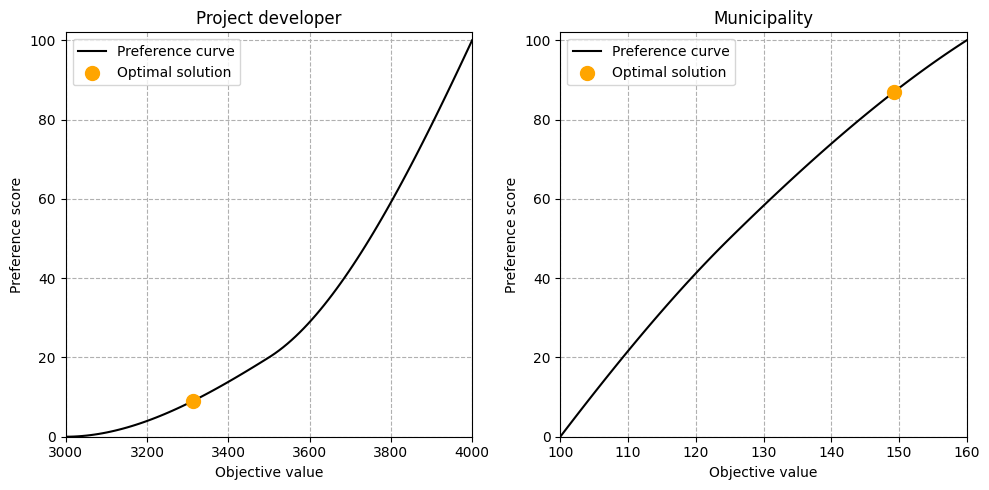

In [4]:
# 5. Solve with both paradigms
paradigm = 'tetra'

print(f'\n{"="*60}')
print(f'Run GA with {paradigm}')
print(f'{"="*60}')

# Set seed immediately before GA run (like in chapter_11_1.ipynb)
np.random.seed(42)

result = problem.solve(paradigm=paradigm)

# 6. Print results
print(f'\nOptimal result:')
for var_name, var_value in result.variables.items():
    print(f'  {var_name} = {var_value:.2f} houses')

print(f'\nScore: {result.score:.4f}')

print(f'\nStakeholder results:')
for name, data in result.stakeholders.items():
    print(f'  {name}:')
    print(f'    Objective value: {data["objective_value"]:.2f}')
    print(f'    Preference score: {data["preference_score"]:.2f}')

# 7. Plot results for tetra
print(f'\n{"="*60}')
print('Plotting results for tetra paradigm...')
print(f'{"="*60}\n')

result.plot()